# Social Network Ads 

Regardons des données liées à des publicités faites sur les réseaux sociaux. Ce dataset décrit cette fois le fait qu'une personne ait cliqué sur une publicité en fonction de différents facteurs. 


**1. Importez les librairies classiques et visualisez les premières lignes du dataset**

In [0]:
import seaborn as sns
import pandas as pd 
import numpy as np 

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Social_Network_Ads.csv to Social_Network_Ads.csv
User uploaded file "Social_Network_Ads.csv" with length 10926 bytes


In [0]:
dataset = pd.read_csv(fn)

In [0]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**2. Regardez la distribution des âges puis la distribution des salaires**

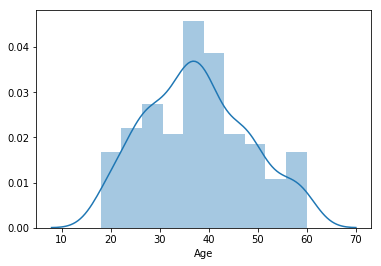

In [0]:
sns.distplot(dataset['Age'])

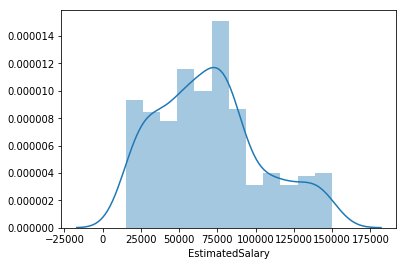

In [0]:
sns.distplot(dataset['EstimatedSalary'])

In [0]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**3. Tentons quelque chose de nouveau. En général, on aime bien *normaliser* les données lorsque l'on fait du machine Learning. Tentons de le faire à la main. Créez une nouvelle colonne dans votre DataFrame dans laquelle vous ferez l'opération suivante :** 

(x - u )/ s

  **- x = _une observation_**
  
  **- u = _la moyenne de votre échantillon_**
  
  **- s = _l'écart-type de votre échantillon_** 
  

In [0]:
dataset["Standard_Salary"] = (dataset.EstimatedSalary - dataset.EstimatedSalary.mean())/dataset.EstimatedSalary.std()

**4. Regardez cette fois la distribution de votre colonne standardisée. Que remarquez vous ?**

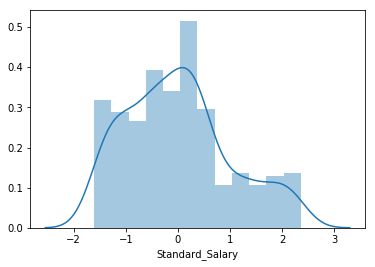

In [0]:
sns.distplot(dataset['Standard_Salary'])

**6. Filtrez uniquement les personnes de votre dataset qui ont cliqués sur la publicité**

In [0]:
people_converted = dataset[dataset["Purchased"]==1]
people_converted.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Standard_Salary
7,15694829,Female,32,150000,1,2.353802
16,15733883,Male,47,25000,1,-1.312214
17,15617482,Male,45,26000,1,-1.282886
18,15704583,Male,46,28000,1,-1.224229
19,15621083,Female,48,29000,1,-1.194901


**7. Quelle est cette fois la distribution de l'âge et des salaires ?**
**Que pouvez vous conclure de ces observations ?**


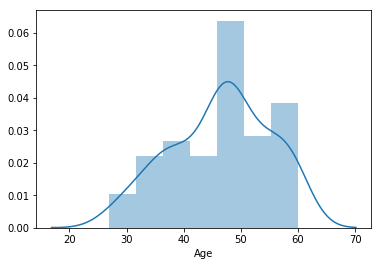

In [0]:
sns.distplot(people_converted['Age'])

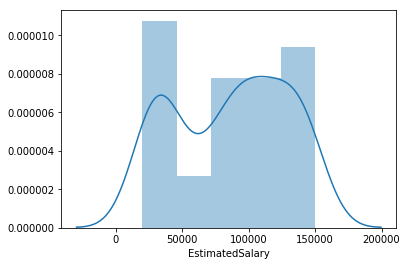

In [0]:
sns.distplot(people_converted['EstimatedSalary'])

**8. Regardez aussi la part des femmes qui ont converties ainsi que la part des hommes**

Gender
Female    0.538462
Male      0.461538
Name: Purchased, dtype: float64


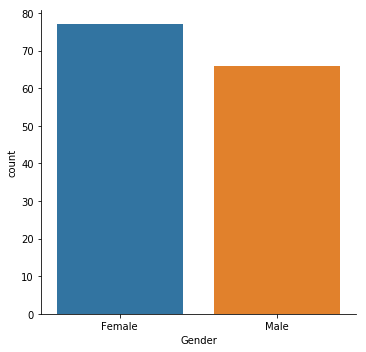

In [0]:
sns.catplot(people_converted.columns[1], data = people_converted, kind="count")

In [0]:
print(people_converted.groupby("Gender").count()["Purchased"]/len(people_converted))

Gender
Female    0.538462
Male      0.461538
Name: Purchased, dtype: float64


**9. Comparez avec la proportion d'hommes et de femmes dans tout le dataset**

**Peut-on conclure quelque chose ?**

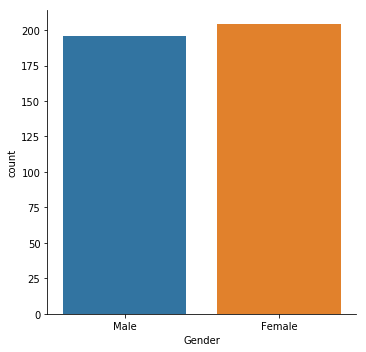

In [0]:
sns.catplot(dataset.columns[1], data = dataset, kind="count")

In [0]:
print(dataset.groupby("Gender").count()["Purchased"]/len(dataset))

Gender
Female    0.51
Male      0.49
Name: Purchased, dtype: float64


**10. Regardez enfin la probabilité de convertir par rapport à chacune des variables**

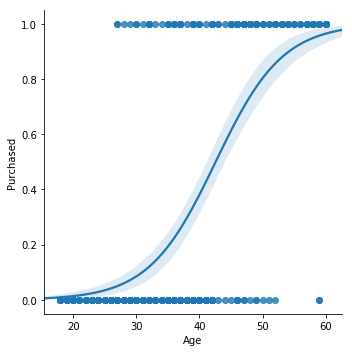

In [0]:
sns.lmplot(x=dataset.columns[2], y=dataset.columns[-2], data=dataset, logistic=True)

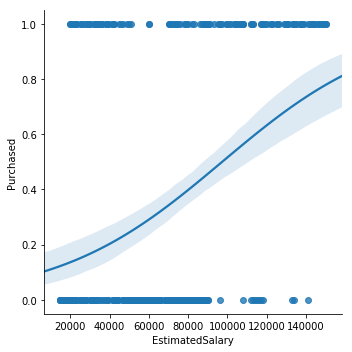

In [0]:
sns.lmplot(x=dataset.columns[3], y=dataset.columns[-2], data=dataset, logistic=True)

**11. Comment vous pourriez interpréter les deux graphiques du dessus ?**

--> Ceux-ci nous montre que plus on avance dans l'âge plus on a de chance d'acheter. Ce raisonnement vaut aussi pour le salaire 